In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
%matplotlib inline



In [2]:
result = pd.read_csv('studentsperformance.csv')
result.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
result.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
result.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<AxesSubplot:>

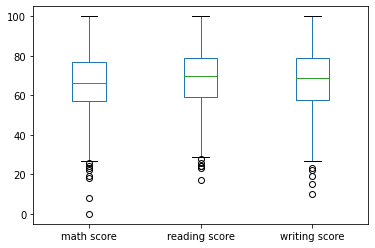

In [6]:
result.plot(kind = "box")

In [7]:
result[result['math score'] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [8]:
result['overall marks'] =result.sum(axis = 1,numeric_only = True)
result['overall marks']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: overall marks, Length: 1000, dtype: int64

In [9]:
result["overall marks"]=(result["overall marks"]*100)/300
result["overall marks"]

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: overall marks, Length: 1000, dtype: float64

In [10]:
result["overall marks"]=result["overall marks"].apply(lambda x :int("{:.0f}".format(x)))

In [11]:
passing_marks = 40
result["math_status"]= np.where(result["math score"]>=passing_marks,"P","F")
result["math_status"]
result["read_status"]= np.where(result["reading score"]>=passing_marks,"P","F")
result["read_status"]
result["write_status"]= np.where(result["writing score"]>=passing_marks,"P","F")



In [12]:
def stat(x):
    if x["math_status"] == "F" or x["write_status"]=="F"or x["read_status"]=="F":
        return  "F"
    else :
        return "P"
             

In [13]:
result.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'overall marks', 'math_status', 'read_status',
       'write_status'],
      dtype='object')

In [14]:
result["status"] = result.apply(stat,axis = 1)
result["overall marks"]

0      73
1      82
2      93
3      49
4      76
       ..
995    94
996    57
997    65
998    74
999    83
Name: overall marks, Length: 1000, dtype: int64

<AxesSubplot:ylabel='Frequency'>

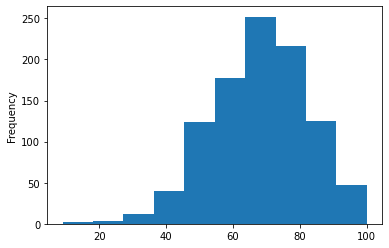

In [15]:
result["overall marks"].plot(kind = "hist",stacked = True)

In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   overall marks                1000 non-null   int64 
 9   math_status                  1000 non-null   object
 10  read_status                  1000 non-null   object
 11  write_status                 1000 non-null   object
 12  status                       1000 non-null   object
dtypes: int64(4), object(9)
memory usag

In [17]:
result.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall marks,math_status,read_status,write_status,status
0,female,group B,bachelor's degree,standard,none,72,72,74,73,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,82,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,76,P,P,P,P


<AxesSubplot:title={'center':'status'}, ylabel='status'>

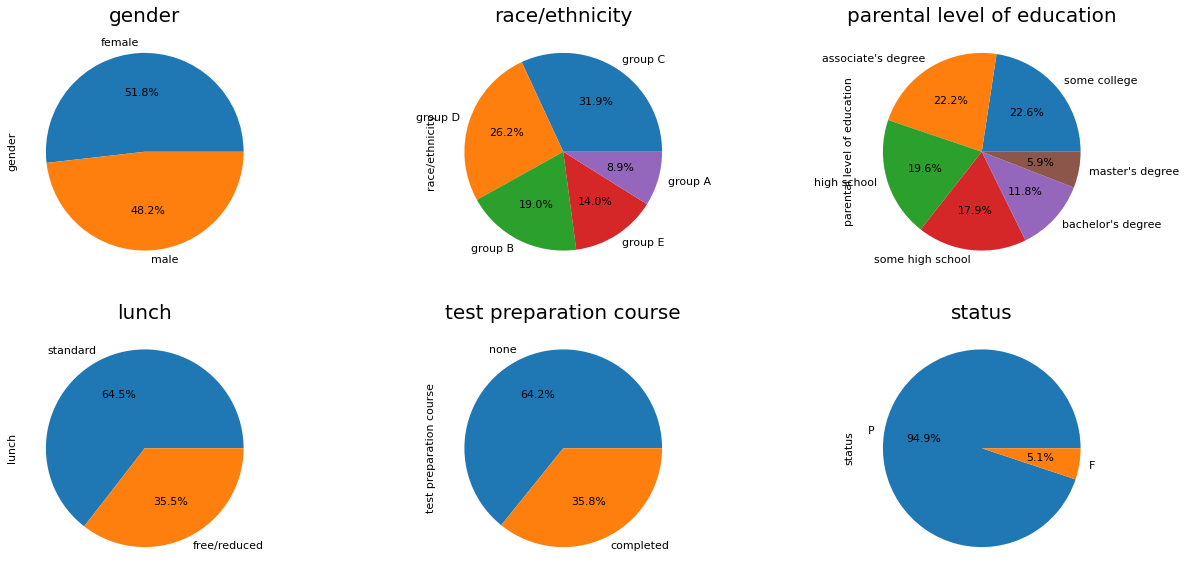

In [18]:
plt.figure(figsize =(20,10))
mlt.rcParams['font.size'] = 11 #for labels of pie chart
plt.subplots_adjust(wspace =0.5,hspace = 0.2)
plt.subplot(231)
plt.title("gender",fontsize=20)
result["gender"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")
plt.subplot(232)
plt.title("race/ethnicity",fontsize=20)
result["race/ethnicity"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")
plt.subplot(233)
plt.title("parental level of education",fontsize=20)
result["parental level of education"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")
plt.subplot(234)
plt.title("lunch",fontsize=20)
result["lunch"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")
plt.subplot(2,3,5)
plt.title("test preparation course",fontsize=20)
result["test preparation course"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")
plt.subplot(2,3,6)
plt.title("status",fontsize=20)
result["status"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")




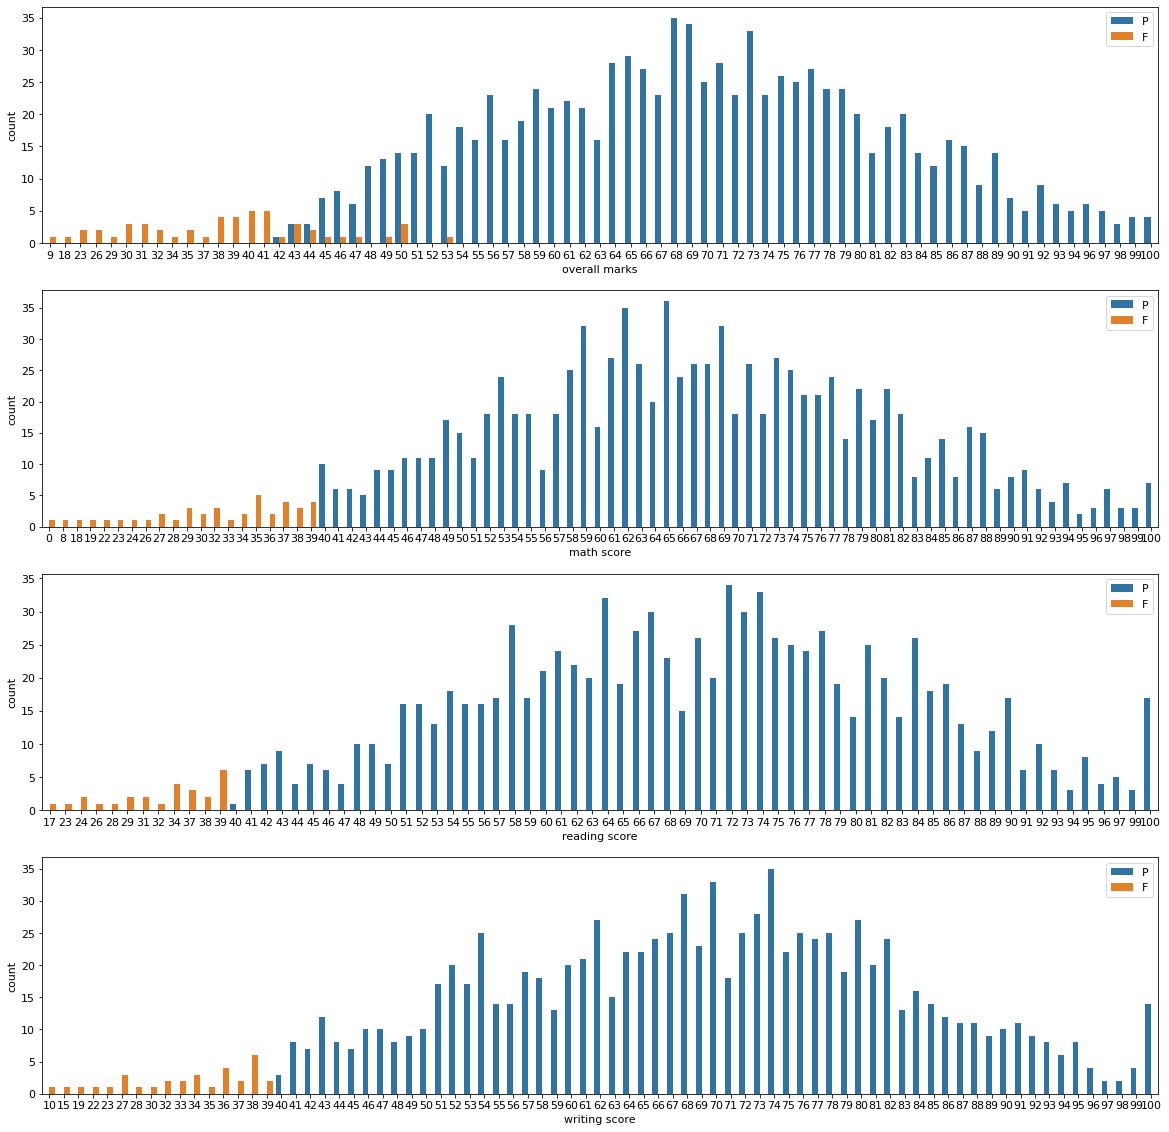

In [19]:
plt.figure(figsize = (20.,20,))
plt.subplot(4,1,1)
d = sns.countplot(x ="overall marks",hue = 'status',data = result)
#mlt.rcParams['figure.figsize'] = (20.,10.)
plt.legend(loc = "upper right")

plt.subplot(4,1,2)
sns.countplot(x ="math score",hue = 'math_status',data = result)
#mlt.rcParams['figure.figsize'] = (20.,10.)
plt.legend(loc = "upper right")
plt.subplot(4,1,3)
sns.countplot(x ="reading score",hue = 'read_status',data = result)
#mlt.rcParams['figure.figsize'] = (20.,10.)
plt.legend(loc = "upper right")
plt.subplot(4,1,4)
sns.countplot(x ="writing score",hue = 'write_status',data = result)
#mlt.rcParams['figure.figsize'] = (20.,10.)
plt.legend(loc = "upper right")



In [20]:
#now that we have seen marks distributions amd obverview of factors in marks lets go in detail
#how factors are influencing marks

In [21]:
print("female data\n " ,result[result["gender"]=="female"].describe())
print("male data\n",result[result["gender"]=="male"].describe())


female data
         math score  reading score  writing score  overall marks
count  518.000000     518.000000     518.000000     518.000000
mean    63.633205      72.608108      72.467181      69.569498
std     15.491453      14.378245      14.844842      14.530099
min      0.000000      17.000000      10.000000       9.000000
25%     54.000000      63.250000      64.000000      61.000000
50%     65.000000      73.000000      74.000000      70.000000
75%     74.000000      83.000000      82.000000      79.000000
max    100.000000     100.000000     100.000000     100.000000
male data
        math score  reading score  writing score  overall marks
count  482.000000     482.000000     482.000000     482.000000
mean    68.728216      65.473029      63.311203      65.819502
std     14.356277      13.931832      14.113832      13.711862
min     27.000000      23.000000      15.000000      23.000000
25%     59.000000      56.000000      53.000000      56.000000
50%     69.000000      66.0000

In [22]:
#we can clearly see that mean marks of girls is batter than boys except in maths that implies boys are more good at maths
#now lets see on no. of people having diff. marks

Text(0.5, 1.0, 'overall score')

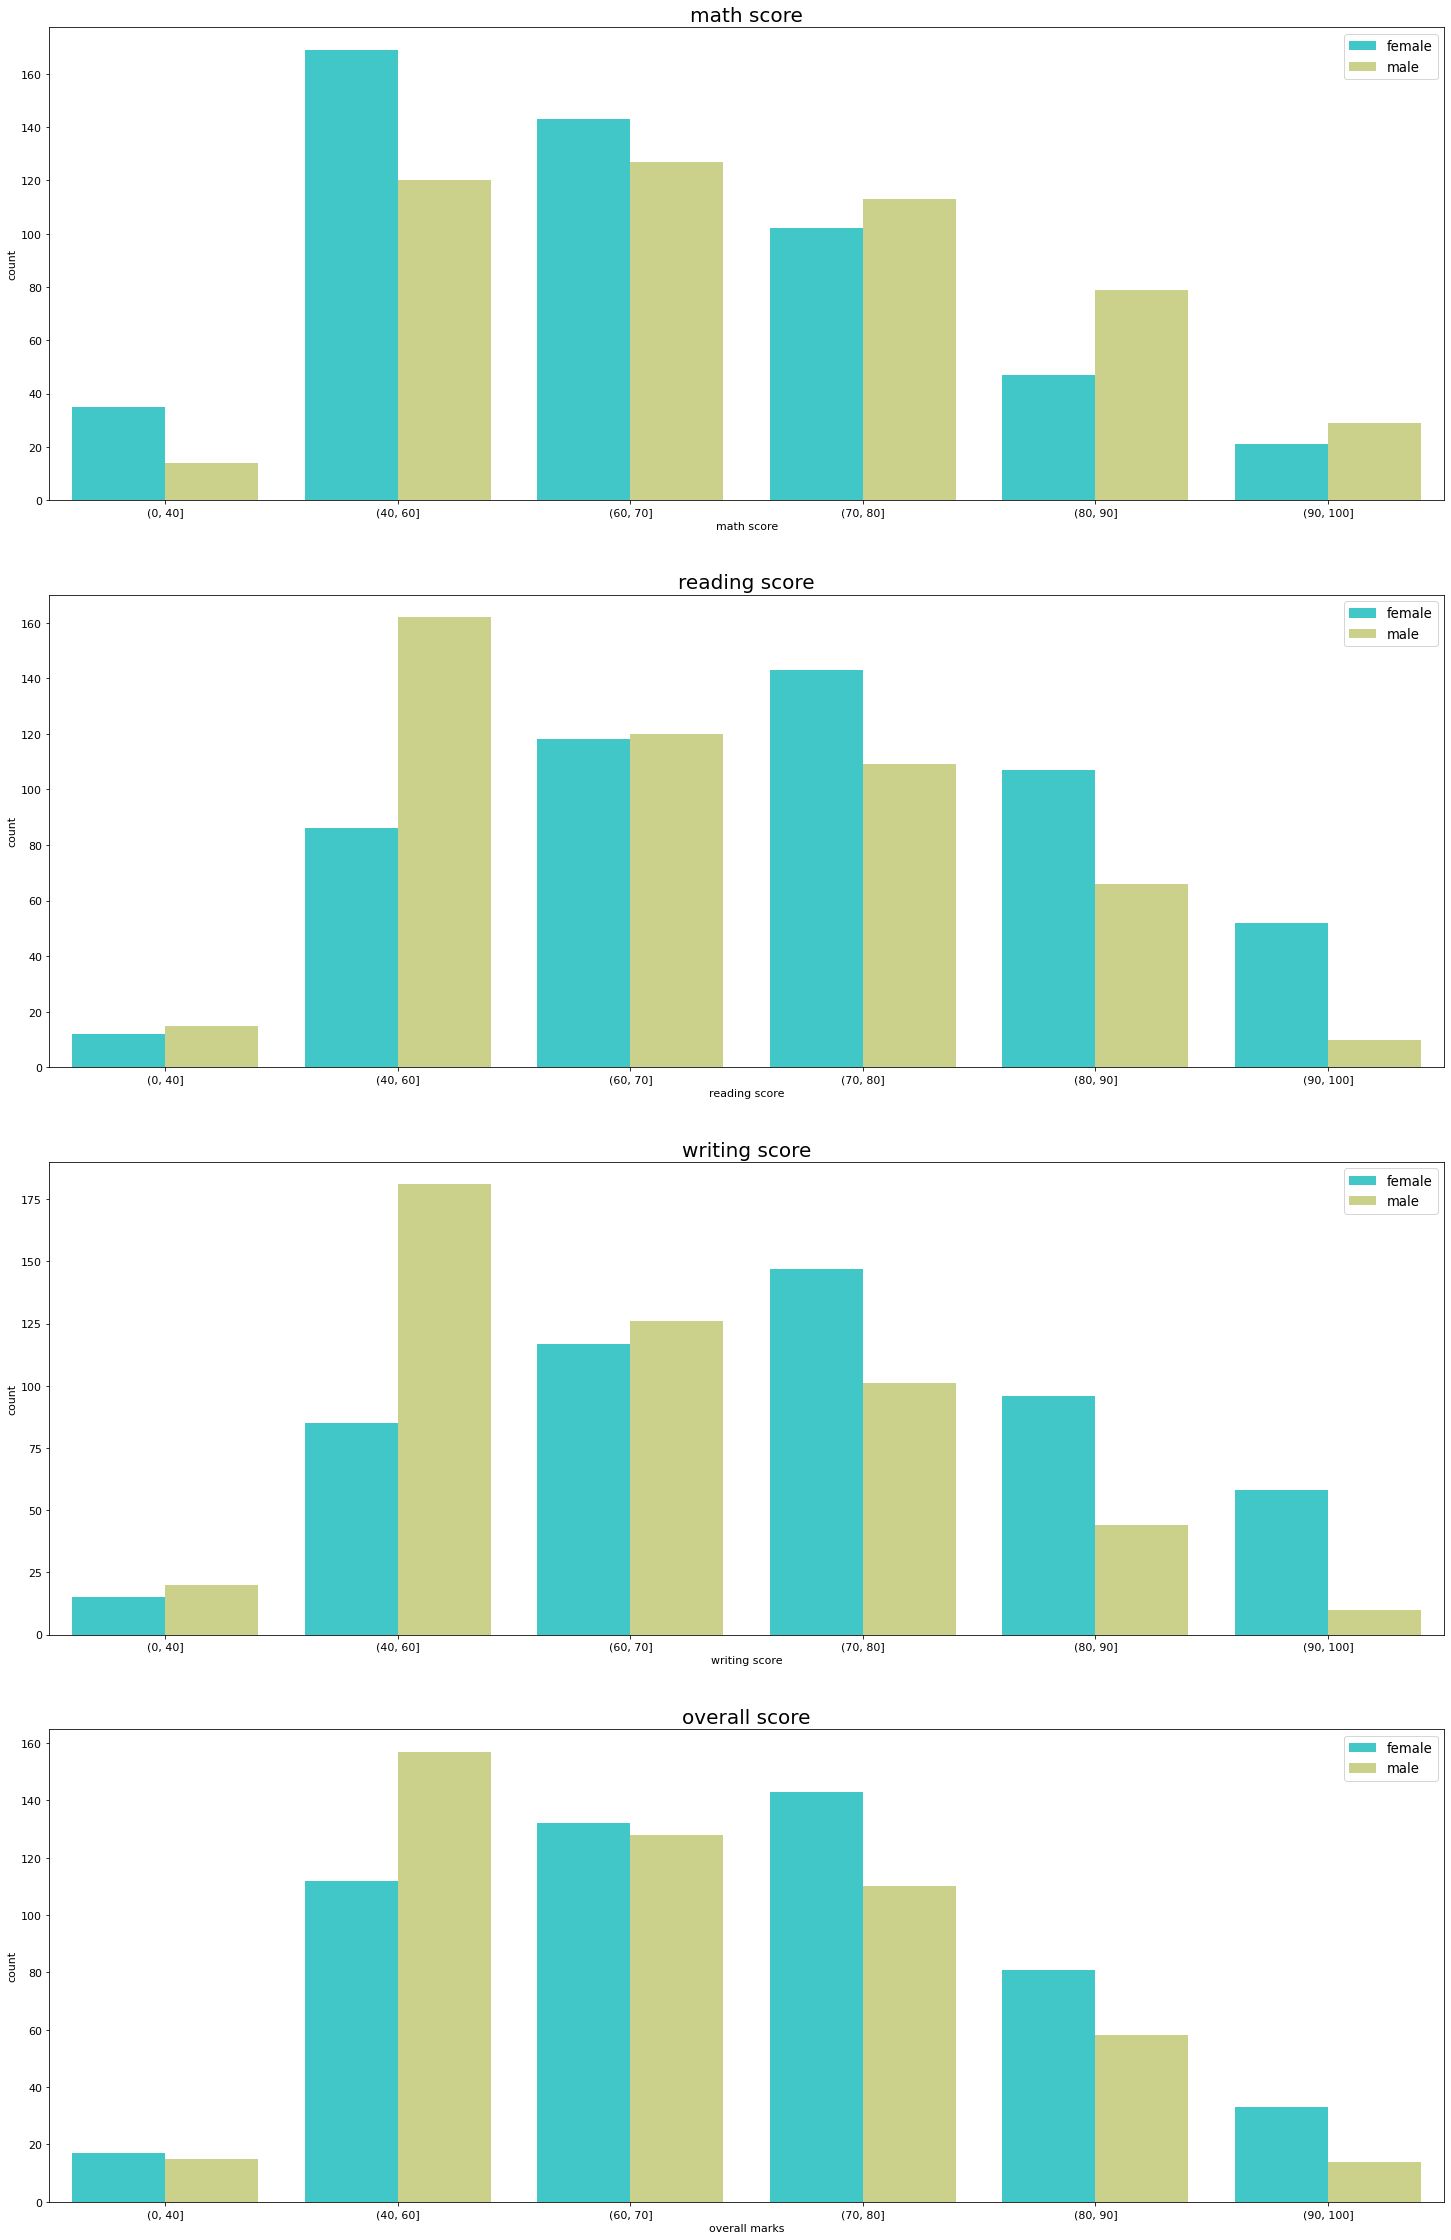

In [23]:
bins = [0,40,60,70,80,90,100]
plt.figure(figsize = (25.0,40.0))
plt.subplot(411)
sns.countplot(x = pd.cut(result["math score"],bins =bins),hue = "gender",data = result,palette ="rainbow")
plt.legend(fontsize = "large")
plt.title("math score",fontsize = 20)
plt.subplot(412)
sns.countplot(x = pd.cut(result["reading score"],bins =bins),hue = "gender",data = result,palette ="rainbow")
plt.legend(fontsize = "large")
plt.title("reading score",fontsize = 20)
plt.subplot(413)
sns.countplot(x = pd.cut(result["writing score"],bins =bins),hue = "gender",data = result,palette ="rainbow")
plt.legend(fontsize = "large")
plt.title("writing score",fontsize = 20)
plt.subplot(414)
sns.countplot(x = pd.cut(result["overall marks"],bins =bins),hue = "gender",data = result,palette ="rainbow")
plt.legend(fontsize = "large")
plt.title("overall score",fontsize = 20)

In [24]:
#overall we can see that girls marks have more variation than boy's
#overall no.of fail students is more in girls than boys

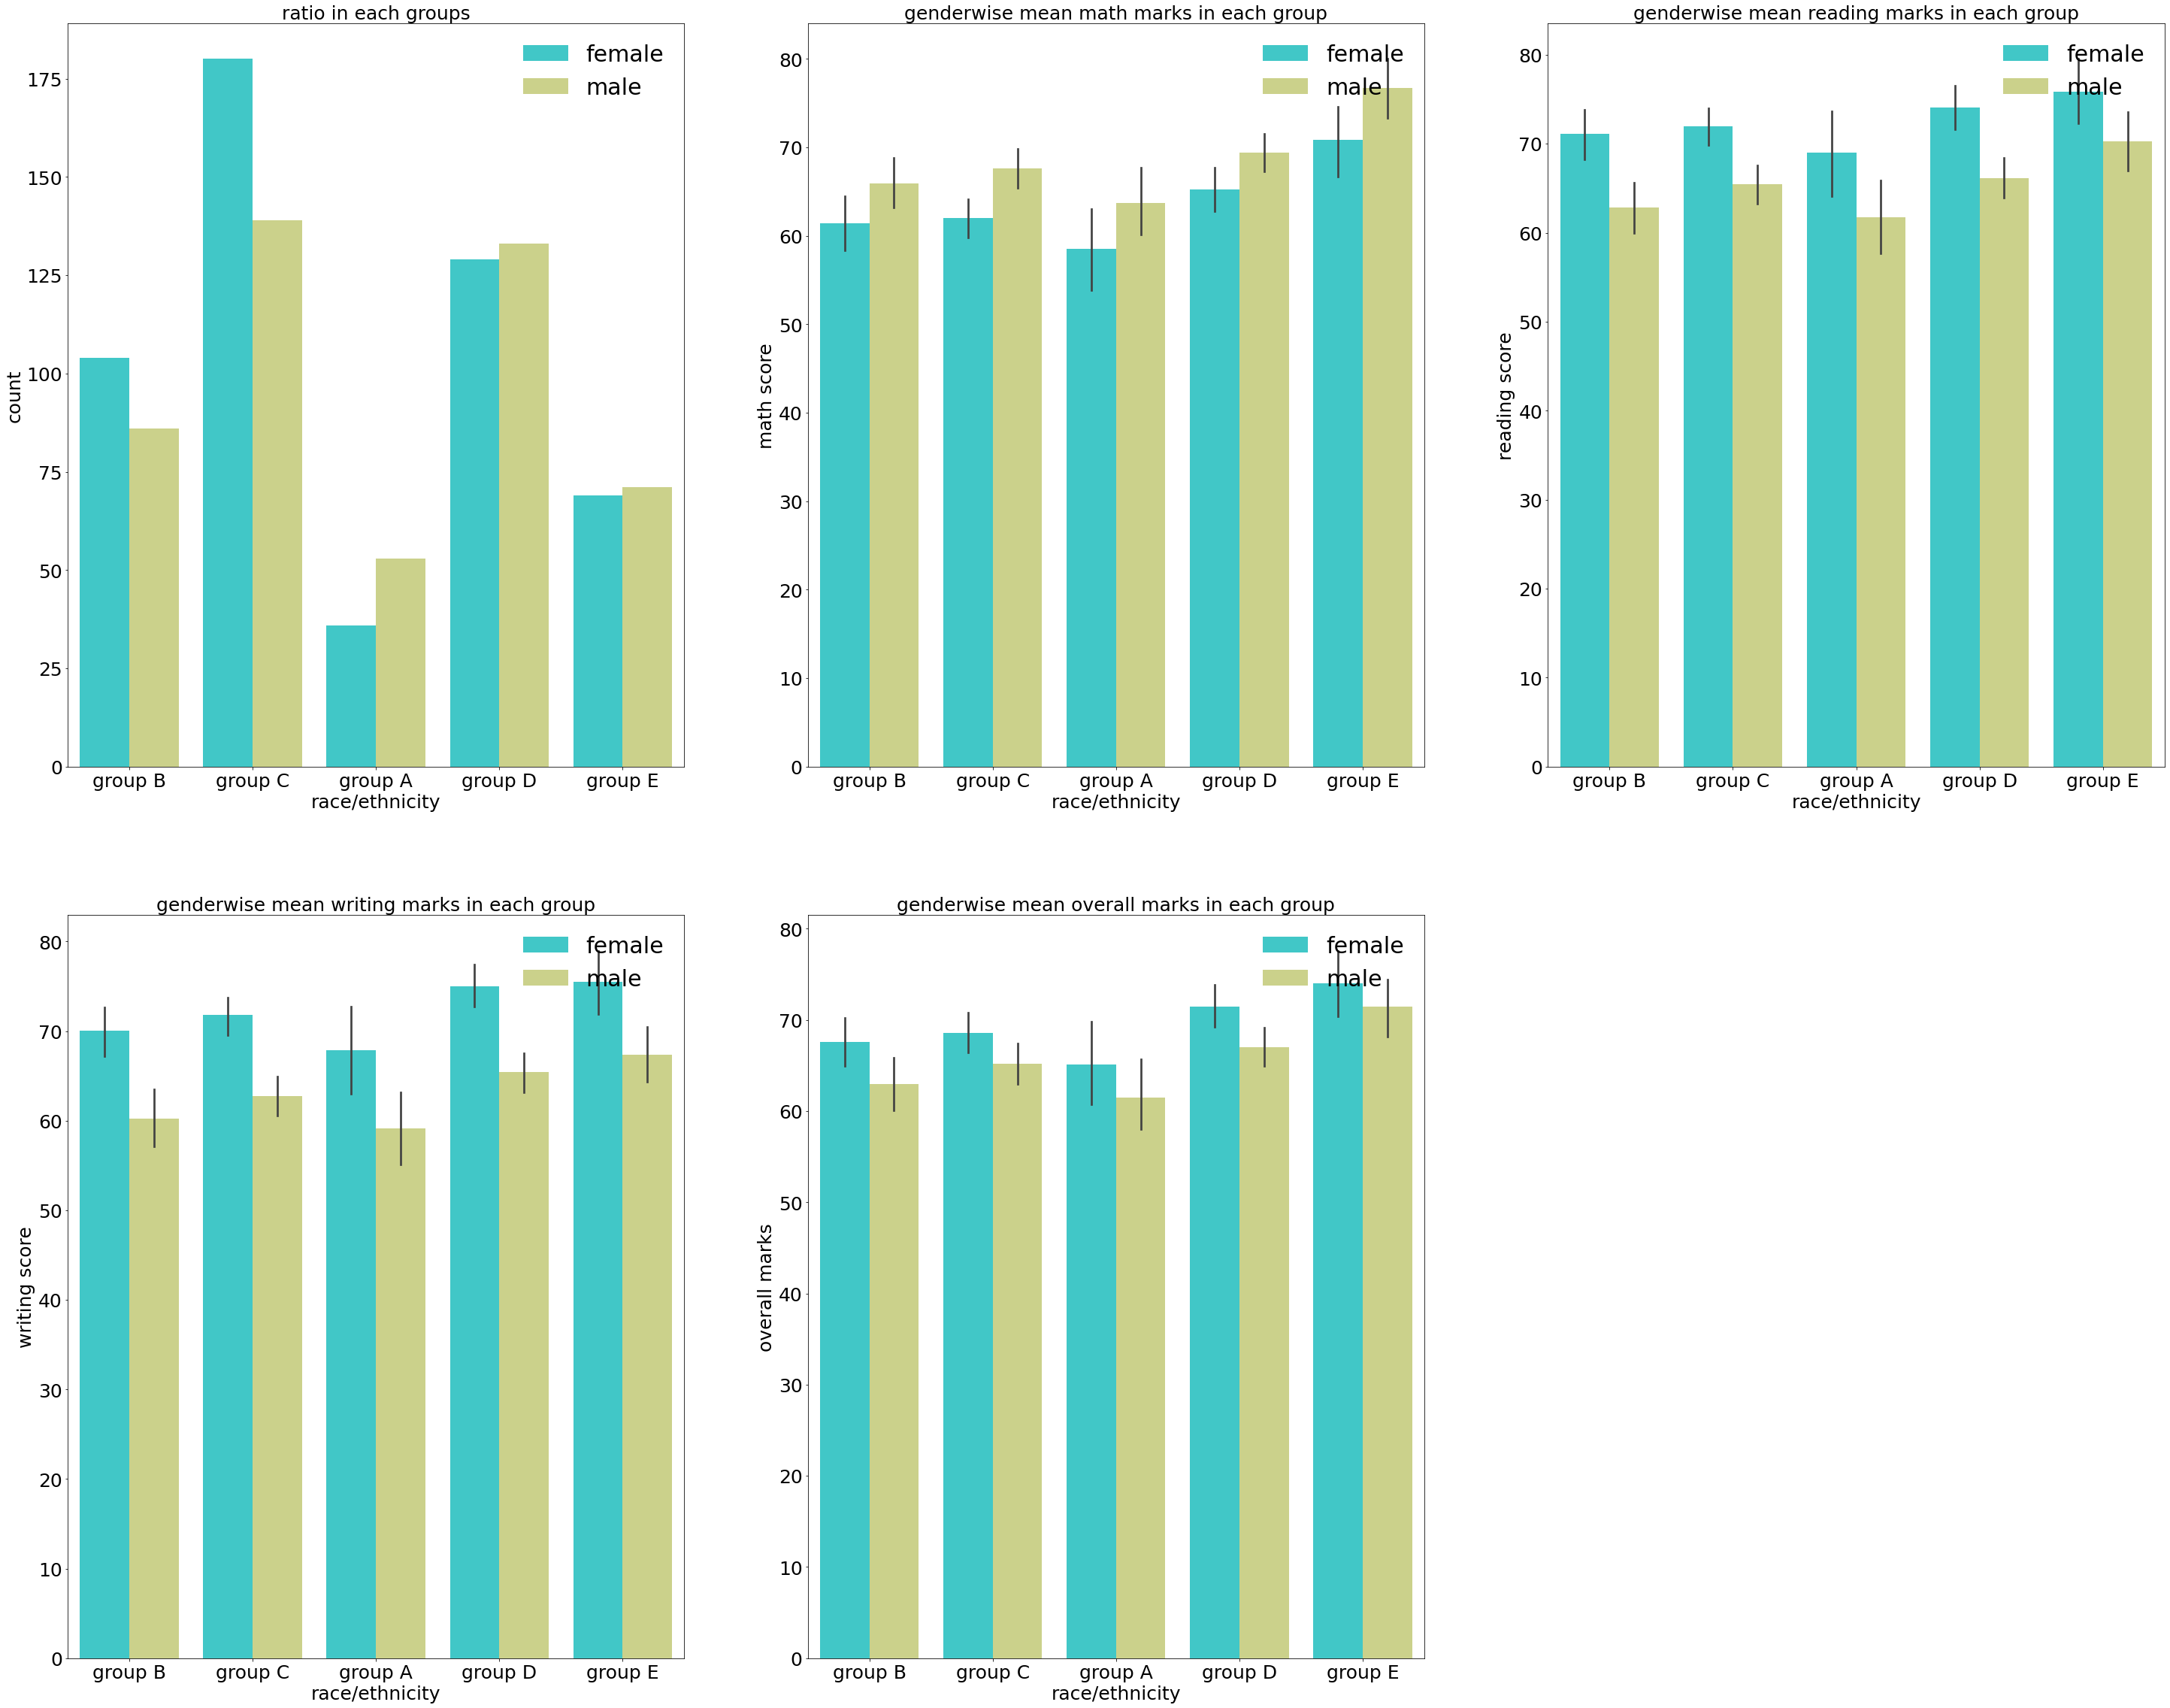

In [25]:
plt.figure(figsize = (50.0,40.0))
#plt.subplots_adjust(wspace = 0.2,hspace = 0.4)
ax1 = plt.subplot(2,3,1)
sns.countplot(x = "race/ethnicity",hue = "gender" ,data = result,palette ="rainbow")
plt.title("ratio in each groups")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
ax2 = plt.subplot(2,3,2)
sns.barplot(x="race/ethnicity" ,hue = "gender",y="math score",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("genderwise mean math marks in each group")
ax3 = plt.subplot(2,3,3)
sns.barplot(x="race/ethnicity" ,hue = "gender",y="reading score",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("genderwise mean reading marks in each group")
ax4 = plt.subplot(2,3,4)
sns.barplot(x="race/ethnicity" ,hue = "gender",y="writing score",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("genderwise mean writing marks in each group")
ax5 = plt.subplot(2,3,5)
sns.barplot(x="race/ethnicity" ,hue = "gender",y="overall marks",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("genderwise mean overall marks in each group")
for n in plt.gcf().get_axes():
    for items in ([n.title,n.xaxis.label,n.yaxis.label]+n.get_xticklabels()+n.get_yticklabels()):
        items.set_fontsize(25)


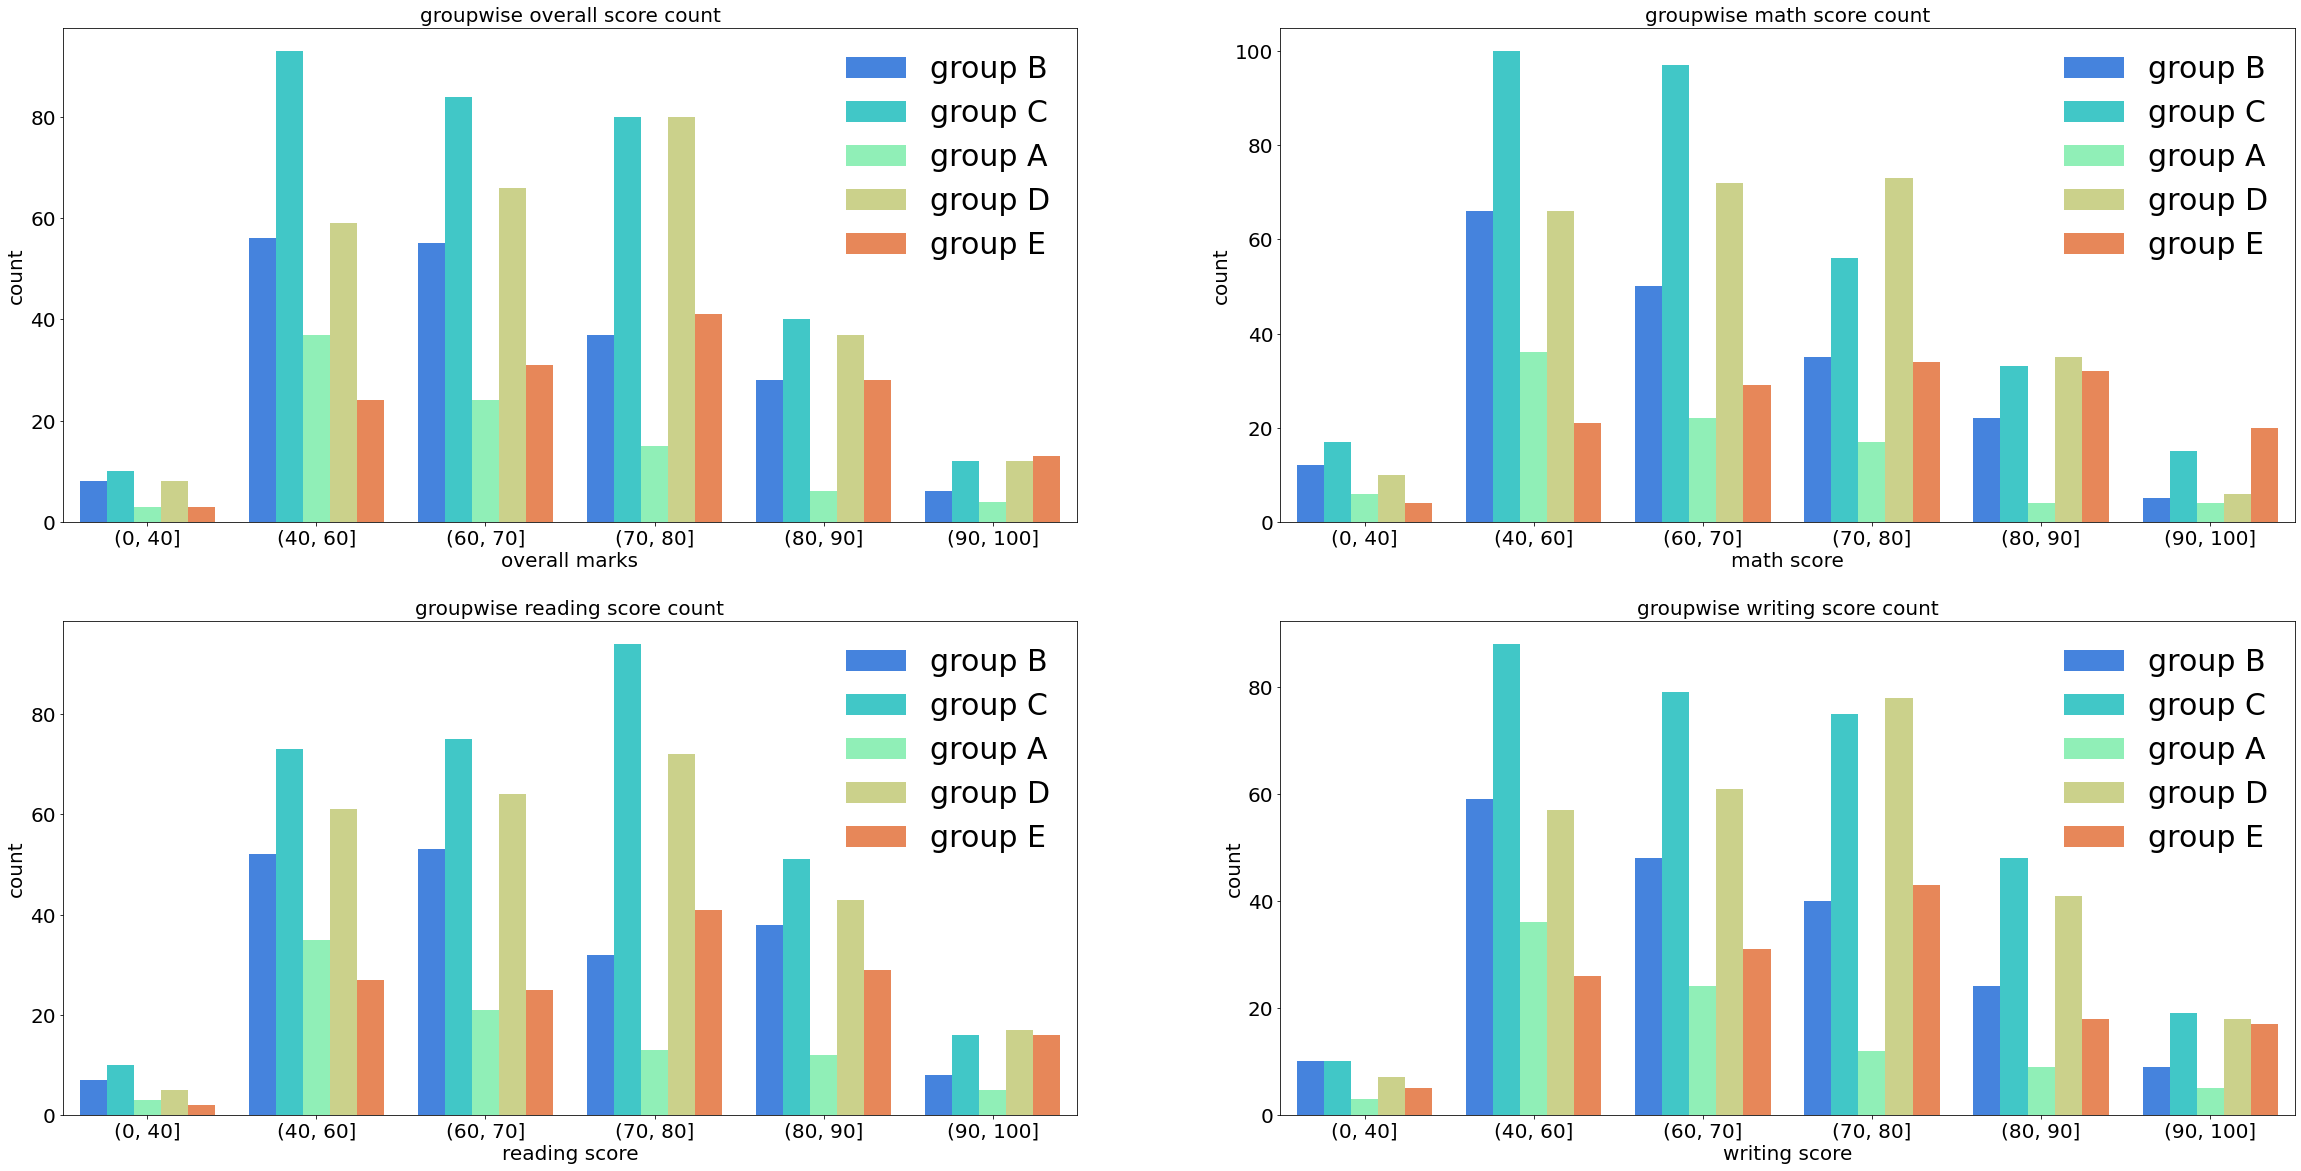

In [26]:
plt.figure(figsize=(40.0,20.0))
ax2 = plt.subplot(2,2,1)
sns.countplot(x=pd.cut(result["overall marks"],bins =bins) ,hue = "race/ethnicity",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("groupwise overall score count")
ax3 = plt.subplot(222)
sns.countplot(x=pd.cut(result["math score"],bins =bins) ,hue = "race/ethnicity",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("groupwise math score count")
ax4 = plt.subplot(223)
sns.countplot(x=pd.cut(result["reading score"],bins =bins) ,hue = "race/ethnicity",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("groupwise reading score count")
ax5 = plt.subplot(224)
sns.countplot(x=pd.cut(result["writing score"],bins =bins) ,hue = "race/ethnicity",data = result,palette ="rainbow")
plt.legend(loc = "upper right",frameon = False,fontsize=30)
plt.title("groupwise writing score count")


for n in plt.gcf().get_axes():
    for items in ([n.title,n.xaxis.label,n.yaxis.label]+n.get_xticklabels()+n.get_yticklabels()):
        items.set_fontsize(20)


Text(0.5, 1.0, 'writing status')

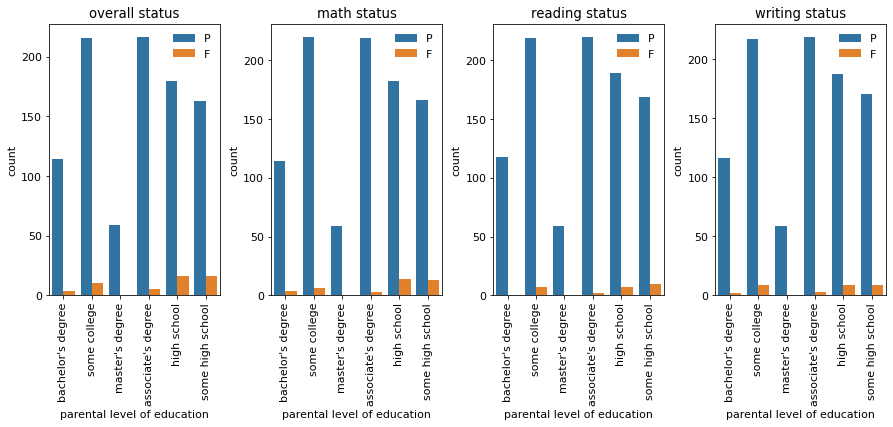

In [27]:
plt.figure(figsize= (15.,5.))
plt.subplots_adjust(wspace = 0.3)
ax1 = plt.subplot(141)
sns.countplot(x= "parental level of education",hue = "status",data = result)
plt.xticks(rotation= 90 )
plt.legend(frameon = False )
plt.title("overall status")
ax2 = plt.subplot(142)
sns.countplot(x= "parental level of education",hue = "math_status",data = result)
plt.xticks(rotation= 90 )
plt.legend(frameon = False )
plt.title("math status")
ax3 = plt.subplot(143)
sns.countplot(x= "parental level of education",hue = "read_status",data = result)
plt.xticks(rotation= 90 )
plt.legend(frameon = False)
plt.title("reading status")
ax4 = plt.subplot(144)
sns.countplot(x= "parental level of education",hue = "write_status",data = result)
plt.xticks(rotation= 90 )
plt.legend(frameon = False)
plt.title("writing status")




In [28]:
#beforeplotting all four observe that it has some new inferance or not
#sns.countplot(x=pd.cut(result["math score"],bins =bins) ,hue = "parental level of education",data = result,palette ="rainbow")


In [29]:
#as education level of parents is increasing the no.of fail students is dcrsng


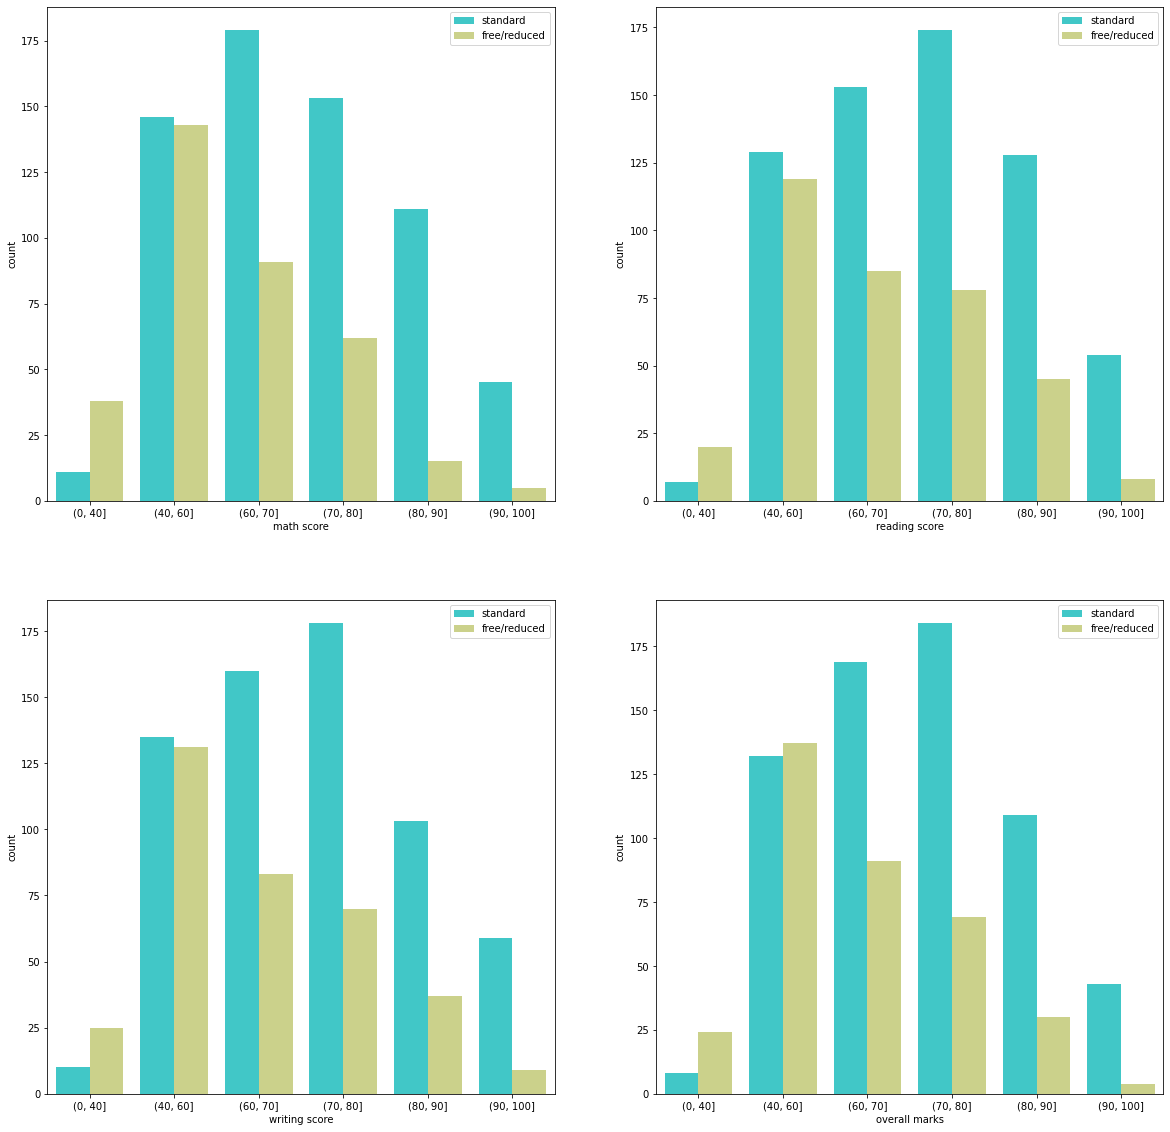

In [30]:
plt.figure(figsize = (20.,20.))
plt.subplot(2,2,1)
ax6 = sns.countplot(x=pd.cut(result["math score"],bins =bins) ,hue = "lunch",data = result,palette ="rainbow")
ax6.legend(fontsize = 10)
plt.subplot(2,2,2)
ax7 = sns.countplot(x=pd.cut(result["reading score"],bins =bins) ,hue = "lunch",data = result,palette ="rainbow")
ax7.legend(fontsize = 10)
plt.subplot(2,2,3)
ax8 = sns.countplot(x=pd.cut(result["writing score"],bins =bins) ,hue = "lunch",data = result,palette ="rainbow")
ax8.legend(fontsize = 10)
plt.subplot(2,2,4)
ax9 = sns.countplot(x=pd.cut(result["overall marks"],bins =bins) ,hue = "lunch",data = result,palette ="rainbow")
ax9.legend(fontsize = 10)
for n in plt.gcf().get_axes():
    for items in ([n.title, n.xaxis.label, n.yaxis.label] + n.get_xticklabels()+n.get_yticklabels()):
        items.set_fontsize(10)

In [31]:
#here we can observe that number of total students taking standard lunch is comparatively higher than students taking free lunch
#then also no. of failed student is more for free lunch
#better food to be provided in order to not have any fail students 

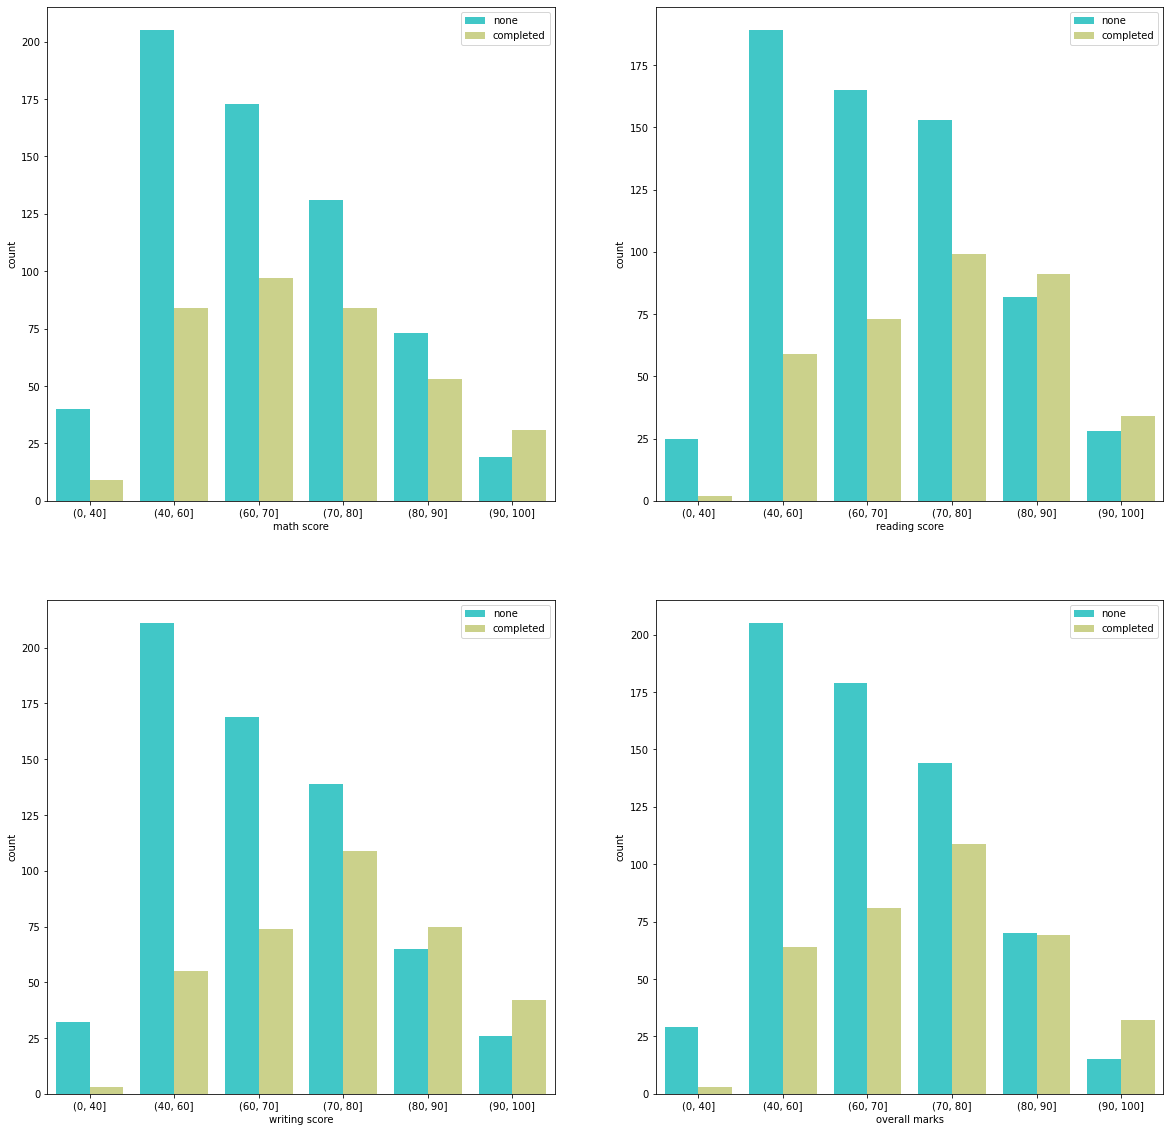

In [32]:
plt.figure(figsize = (20.,20.))
plt.subplot(2,2,1)
sns.countplot(x=pd.cut(result["math score"],bins =bins) ,hue = "test preparation course",data = result,palette ="rainbow")
plt.legend(fontsize = 10)
plt.subplot(2,2,2)
sns.countplot(x=pd.cut(result["reading score"],bins =bins) ,hue = "test preparation course",data = result,palette ="rainbow")
plt.legend(fontsize = 10)
plt.subplot(2,2,3)
sns.countplot(x=pd.cut(result["writing score"],bins =bins) ,hue = "test preparation course",data = result,palette ="rainbow")
plt.legend(fontsize = 10)
plt.subplot(2,2,4)
sns.countplot(x=pd.cut(result["overall marks"],bins =bins) ,hue = "test preparation course",data = result,palette ="rainbow")
plt.legend(fontsize = 10)
for n in plt.gcf().get_axes():
    for items in ([n.title, n.xaxis.label, n.yaxis.label] + n.get_xticklabels()+n.get_yticklabels()):
        items.set_fontsize(10)

In [33]:
#students who have completed their test preparation course are less prone to fail
#the max. students with highers marks have completed test preparation course

In [34]:
#now that we have seen dependecy of marks on various factors.let's see if any other variable is depoendent on each other

In [35]:
result.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'overall marks', 'math_status', 'read_status',
       'write_status', 'status'],
      dtype='object')

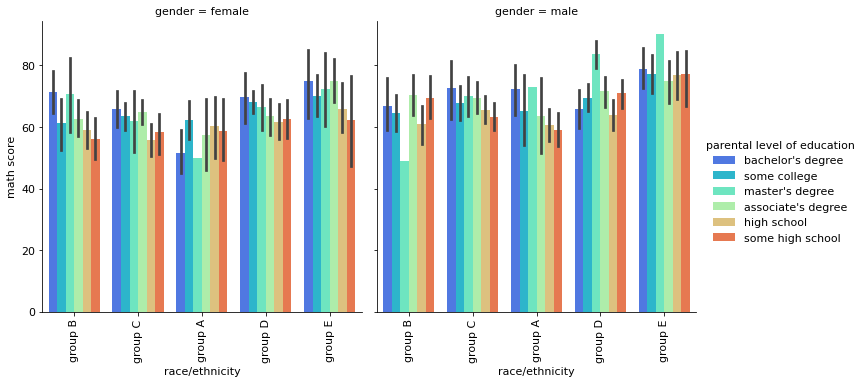

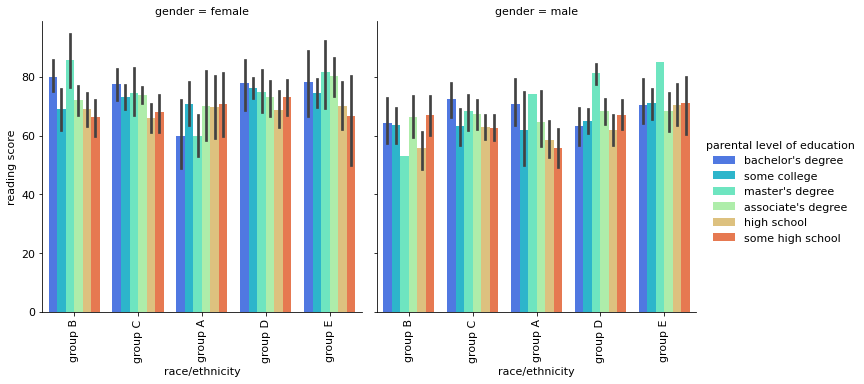

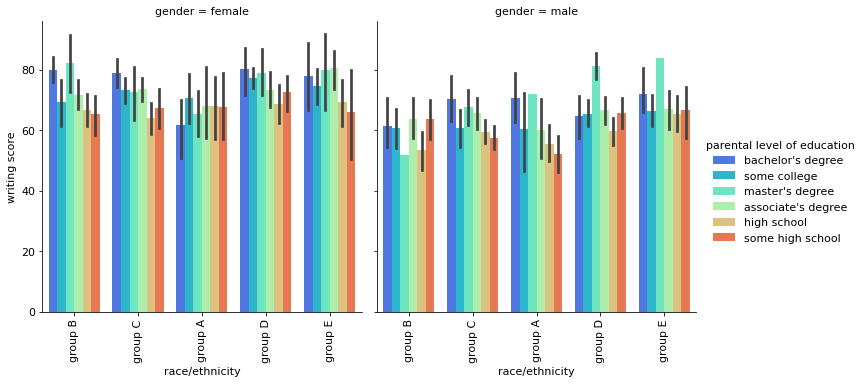

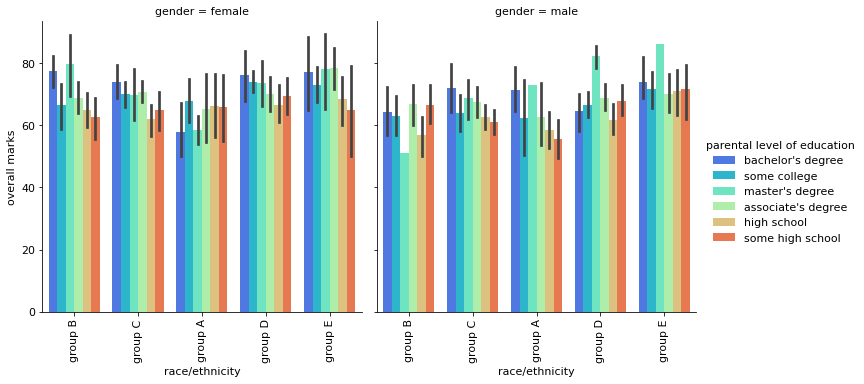

In [36]:
ax1=sns.catplot(kind = "bar",x="race/ethnicity" ,hue= "parental level of education",col = "gender",data = result,palette = "rainbow",legend = True,sharey = True,y="math score")
ax1.set_xticklabels(rotation=90)
ax2=sns.catplot(kind = "bar",x="race/ethnicity" ,hue= "parental level of education",col = "gender",data = result,palette = "rainbow",legend = True,sharey = True,y="reading score")
ax2.set_xticklabels(rotation=90)
ax3=sns.catplot(kind = "bar",x="race/ethnicity" ,hue= "parental level of education",col = "gender",data = result,palette = "rainbow",legend = True,sharey = True,y="writing score")
ax3.set_xticklabels(rotation=90)
ax4=sns.catplot(kind = "bar",x="race/ethnicity" ,hue= "parental level of education",col = "gender",data = result,palette = "rainbow",legend = True,sharey = True,y="overall marks")
ax4.set_xticklabels(rotation=90)
plt.show()



In [37]:
#group d and grop did best in subjects
#in all subjects  group d and group e male did better whose parents have maters degree
#the strength of group a students is munimum and the girls are underperforming in each case
#group a should get more aware about education and girls education
#we can see that students whose parents have bachelors degree and masters degree are performing better

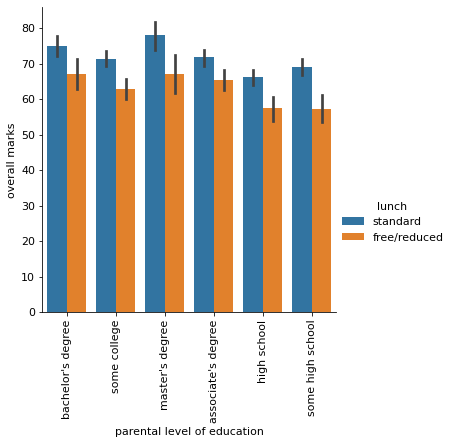

In [38]:
sns.catplot(x="parental level of education",y = "overall marks",data = result,kind ="bar",hue ="lunch")
plt.xticks(rotation = 90)
plt.show()

In [39]:
#we can see that lunch affected results

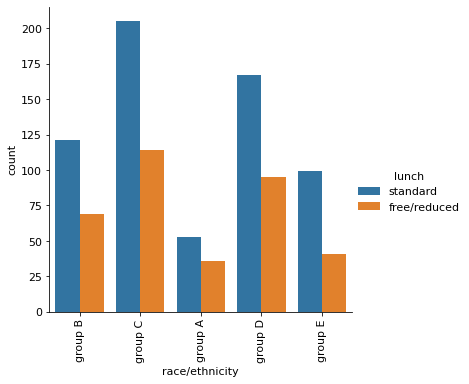

In [40]:
sns.catplot(x="race/ethnicity",data = result,kind ="count",hue ="lunch")
plt.xticks(rotation = 90)
plt.show()

In [41]:
#there is no connection etween group and lunch
#no connectiion beteween education and lunch 
#no connwctionbetween group and education

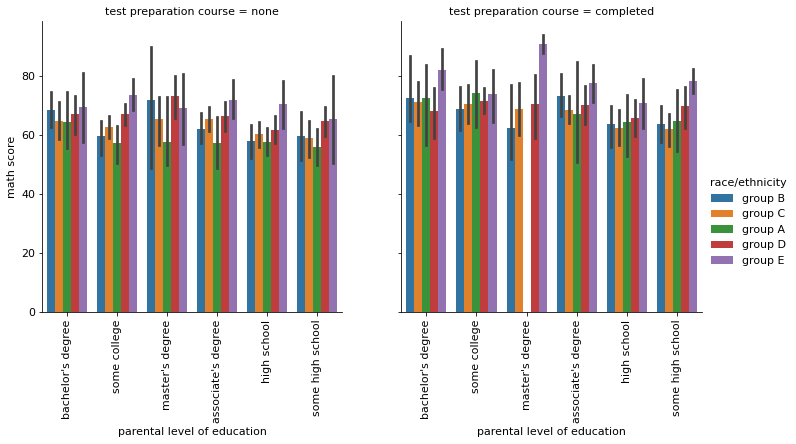

In [42]:
s = sns.catplot(x="parental level of education",data = result,kind ="bar",y="math score",hue= "race/ethnicity",col ="test preparation course")
s.set_xticklabels(rotation = 90)
plt.show()

In [43]:
#parents with master degree are focusing less on test preparartion course

In [44]:
#now lets develop model to analyze

In [45]:
result.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall marks,math_status,read_status,write_status,status
0,female,group B,bachelor's degree,standard,none,72,72,74,73,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,82,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,76,P,P,P,P
